# Word Graph pada paper banjir di samarinda

In [1]:
!pip install PyPDF2 nltk networkx pandas matplotlib tqdm
import os, re, math
from collections import Counter
from itertools import combinations
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
import PyPDF2
import re
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

nltk.download("punkt")  # sekali saja

# --- baca PDF ---
def read_pdf(path):
    pages = []
    with open(path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        for p in reader.pages:
            t = p.extract_text()
            if t:
                pages.append(t)
    return "\n".join(pages)

# GANTI path kalau perlu
pdf_text = read_pdf("document.pdf")

print("Panjang teks mentah:", len(pdf_text))
print(pdf_text[:500])

Panjang teks mentah: 16374
39    Jurnal Geografi Gea, Volume 20, Nomor 1, April 2020  
 
 
ANALISIS PENYEBAB BANJIR DI KOTA SAMARINDA  
 
Haris  Setiawan1, Muhammad Jalil2, Muhammad Enggi S3, Fathan Purwadi4, Christopel 
Adios S5, Asri Wahyu Brata6, Andi Syaful Jufda7 
1,2,3,4,5,6 ,7Program Studi Pendidikan Geografi, Fakulta s Keguruan dan Ilmu Pendidikan,  
Universitas Mulawarman  
121enggi@gmail.com   
 
ABSTRACT  
The purpose of this study was to determine the distribution of floods in Samarinda City, 
identify the cau


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# pastikan tokenizer tersedia
nltk.download('punkt')

def clean_text(text):
    # buang bagian referensi kalau ada
    cut = re.search(
        r"(DAFTAR PUSTAKA|REFERENSI|References|Bibliographie)",
        text,
        re.IGNORECASE
    )
    if cut:
        text = text[:cut.start()]

    # rapikan spasi
    text = re.sub(r"\s+", " ", text)
    return text.strip()


# =====================
# 1. CLEAN TEXT
# =====================
cleaned = clean_text(pdf_text)

print("Panjang teks cleaned:", len(cleaned))
print(cleaned[:500])


# =====================
# 2. PARAGRAF
# =====================
# asumsi paragraf dipisah baris kosong atau newline
paragraphs = [
    p.strip()
    for p in re.split(r"\n\s*\n", pdf_text)
    if p.strip()
]

print("\nJumlah paragraf:", len(paragraphs))
print("Paragraf pertama:\n", paragraphs[0][:300])


# =====================
# 3. KALIMAT
# =====================
sentences = []
for p in paragraphs:
    sentences.extend(sent_tokenize(p))

print("\nJumlah kalimat:", len(sentences))
print("5 kalimat pertama:")
for s in sentences[:5]:
    print("-", s)


# =====================
# 4. KATA
# =====================
words = []
for s in sentences:
    tokens = word_tokenize(s.lower())
    tokens = [re.sub(r"[^a-zA-Z]", "", t) for t in tokens]
    tokens = [t for t in tokens if t != ""]
    words.extend(tokens)

print("\nTotal kata:", len(words))
print("20 kata pertama:", words[:20])


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Panjang teks cleaned: 13944
39 Jurnal Geografi Gea, Volume 20, Nomor 1, April 2020 ANALISIS PENYEBAB BANJIR DI KOTA SAMARINDA Haris Setiawan1, Muhammad Jalil2, Muhammad Enggi S3, Fathan Purwadi4, Christopel Adios S5, Asri Wahyu Brata6, Andi Syaful Jufda7 1,2,3,4,5,6 ,7Program Studi Pendidikan Geografi, Fakulta s Keguruan dan Ilmu Pendidikan, Universitas Mulawarman 121enggi@gmail.com ABSTRACT The purpose of this study was to determine the distribution of floods in Samarinda City, identify the causes of flooding in Samarinda

Jumlah paragraf: 22
Paragraf pertama:
 39    Jurnal Geografi Gea, Volume 20, Nomor 1, April 2020

Jumlah kalimat: 147
5 kalimat pertama:
- 39    Jurnal Geografi Gea, Volume 20, Nomor 1, April 2020
- ANALISIS PENYEBAB BANJIR DI KOTA SAMARINDA
- Haris  Setiawan1, Muhammad Jalil2, Muhammad Enggi S3, Fathan Purwadi4, Christopel 
Adios S5, Asri Wahyu Brata6, Andi Syaful Jufda7 
1,2,3,4,5,6 ,7Program Studi Pendidikan Geografi, Fakulta s Keguruan dan Ilmu Pendidikan,  
Uni

In [4]:
from itertools import zip_longest

G = nx.Graph()

# tambahkan node
for w in words:
    if not G.has_node(w):
        G.add_node(w)

# tambahkan edge untuk pasangan bertetangga (distance = 1)
for w1, w2 in zip(words, words[1:]):
    if w1 == "" or w2 == "":
        continue
    if G.has_edge(w1, w2):
        # boleh pakai weight kalau mau tahu seberapa sering
        G[w1][w2]["weight"] += 1
    else:
        G.add_edge(w1, w2, weight=1)

print("Jumlah node (kata unik):", G.number_of_nodes())
print("Jumlah edge (pasangan tetangga):", G.number_of_edges())

Jumlah node (kata unik): 747
Jumlah edge (pasangan tetangga): 1494


In [5]:
from collections import Counter

# hitung frekuensi kata untuk pilih N terbesar
freq = Counter(words)
N = 20   # ubah kalau mau 30 / 50 kata, dsb

# ambil N kata paling sering
top_vocab = [w for w, c in freq.most_common(N)]
print("Kata yang dipakai di matriks:", top_vocab)

# buat indeks
idx = {w: i for i, w in enumerate(top_vocab)}

# inisialisasi matriks 0
A = np.zeros((N, N), dtype=int)

# isi matriks: kalau ada edge di graph → 1
for u, v in G.edges():
    if u in idx and v in idx:
        i, j = idx[u], idx[v]
        A[i, j] = 1
        A[j, i] = 1   # graph tak berarah

adj_df = pd.DataFrame(A, index=top_vocab, columns=top_vocab)
adj_df

Kata yang dipakai di matriks: ['banjir', 'yang', 'di', 'samarinda', 'dan', 'kota', 'air', 'bencana', 'daerah', 'the', 'pada', 'sungai', 'hujan', 'adalah', 'dalam', 'manusia', 'akan', 'of', 'dengan', 'pasang']


,banjir,yang,di,samarinda,dan,kota,air,bencana,daerah,the,pada,sungai,hujan,adalah,dalam,manusia,akan,of,dengan,pasang
banjir,1,1,1,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1
yang,1,0,0,1,1,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0
di,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0
samarinda,1,1,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,1,1,0
dan,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
kota,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
air,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1
bencana,1,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
daerah,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
the,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
pr = nx.pagerank(G, weight="weight")  # pakai bobot berapa sering jadi tetangga

# urutkan dari yang terbesar
pr_sorted = sorted(pr.items(), key=lambda x: x[1], reverse=True)

# tampilkan 20 kata terpenting
top_pr = pr_sorted[:20]
pr_df = pd.DataFrame(top_pr, columns=["Kata", "PageRank"])
pr_df

,Kata,PageRank
0,yang,0.025051
1,banjir,0.023020
2,di,0.018381
3,dan,0.016300
4,samarinda,0.015906
5,kota,0.011263
6,air,0.009847
7,the,0.009536
8,daerah,0.007712
9,bencana,0.007564


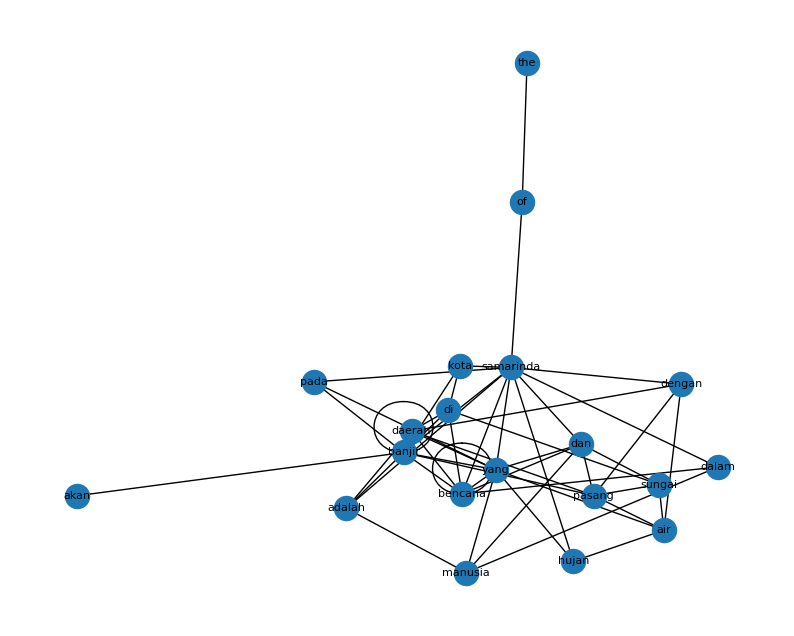

In [7]:
plt.figure(figsize=(10, 8))

subG = G.subgraph(top_vocab)
pos = nx.spring_layout(subG, k=0.4)

nx.draw_networkx_nodes(subG, pos)
nx.draw_networkx_edges(subG, pos)
nx.draw_networkx_labels(subG, pos, font_size=8)

plt.axis("off")
plt.show()